In [259]:
import pandas as pd
import sklearn 
import numpy as np
import matplotlib as plt
from scipy import stats
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.neural_network import MLPRegressor

In [260]:
df_7 = pd.read_csv("data7.csv", header=None, sep=";")

In [261]:
df_7.columns = ["Date", "Value"]
df_7 = df_7.drop(columns=["Date"])

In [262]:
def remove_zeros(df):
    df.loc[~(df==0).all(axis=1)]
    return df

In [263]:
df_7 = df_7.loc[~(df_7==0).all(axis=1)]

In [264]:
print("Num of elements:", df_7.shape[0])

Num of elements: 1363


((array([-3.28582769, -3.02721813, -2.88331666, ...,  2.88331666,
          3.02721813,  3.28582769]),
  array([  1.003,   1.118,   1.14 , ..., 990.   , 990.   , 990.   ])),
 (47.29188172978005, 35.51024724871608, 0.4981835402909242))

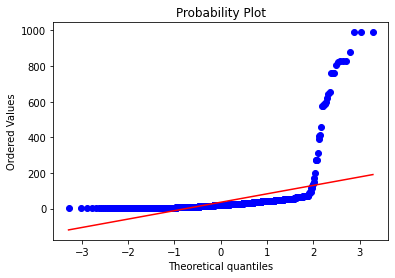

In [265]:
stats.probplot(df_7["Value"], plot=sns.mpl.pyplot)

In [266]:
n = df_7.shape[0]
print("Num of elements:", n)

Num of elements: 1363


<AxesSubplot:>

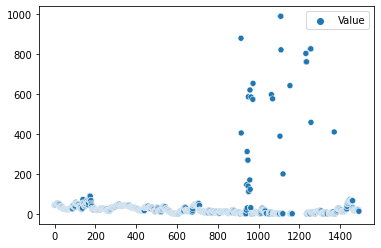

In [267]:
sns.scatterplot(data=df_7)

In [268]:
model = SVR(kernel="rbf")
X = np.array([i for i in range(1, n + 1)]).reshape(-1, 1)
print(X)

[[   1]
 [   2]
 [   3]
 ...
 [1361]
 [1362]
 [1363]]


In [269]:
model.fit(X=X, y=df_7["Value"])

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [270]:
new_dates_15 = np.array([i for i in range(1, n + 15)]).reshape(-1, 1)

In [271]:
res_7_15 = model.predict(X=new_dates_15)

In [272]:
print(len(res_7_15))

1377


In [273]:
res_7_15

array([20.61962215, 20.98750159, 21.00581723, ..., 19.23330355,
       19.23330355, 19.23330355])

In [274]:
vals_7 = np.array(df_7["Value"].where(df_7["Value"] <= 100).astype(float))
len(vals_7)

1363

<AxesSubplot:>

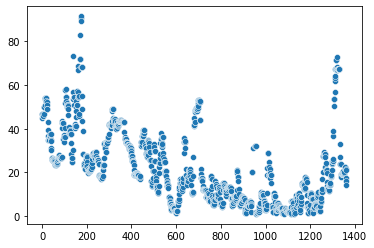

In [275]:
sns.scatterplot(x=[i for i in range(len(vals_7))], y=vals_7)

<AxesSubplot:>

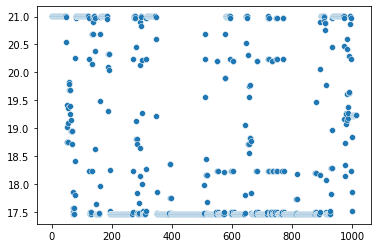

In [276]:
sns.scatterplot(data=res_7_15[n - 1000:])

In [277]:
new_dates_30 = np.array([i for i in range(1, n + 30)]).reshape(-1, 1)
new_dates_45 = np.array([i for i in range(1, n + 45)]).reshape(-1, 1)

In [278]:
res_7_30 = model.predict(X=new_dates_30)
res_7_45 = model.predict(X=new_dates_45)

In [279]:
res_7_45[-30:-1]

array([19.23330355, 19.23330355, 19.23330355, 19.23330355, 19.23330355,
       19.23330355, 19.23330355, 19.23330355, 19.23330355, 19.23330355,
       19.23330355, 19.23330355, 19.23330355, 19.23330355, 19.23330355,
       19.23330355, 19.23330355, 19.23330355, 19.23330355, 19.23330355,
       19.23330355, 19.23330355, 19.23330355, 19.23330355, 19.23330355,
       19.23330355, 19.23330355, 19.23330355, 19.23330355])

## TD8-TCE Dataset

In [280]:
df_8 = pd.read_csv("data8.csv", header=None)
df_8.columns = ["Value"]

In [281]:
print("Num of vals =", df_8.shape[0])

Num of vals = 1493


In [282]:
df_8.head()

,Value
0,31.375
1,30.202
2,30.202
3,30.202
4,29.877


In [283]:
df_8 = remove_zeros(df_8)

In [284]:
print("Num of vals =", df_8.shape[0])

Num of vals = 1493


In [285]:
df_8 = df_8[df_8["Value"] <= 100]

<AxesSubplot:>

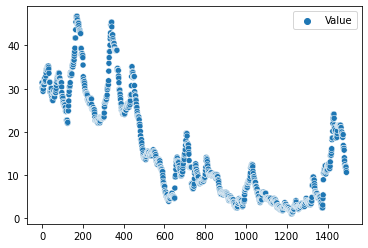

In [286]:
sns.scatterplot(data=df_8)

In [287]:
model_8 = SVR(kernel="rbf")
n_8 = df_8.shape[0]
X = np.array([i for i in range(1, n_8 + 1)]).reshape(-1, 1)
print(X)

[[   1]
 [   2]
 [   3]
 ...
 [1490]
 [1491]
 [1492]]


In [288]:
model_8.fit(X=X, y=df_8["Value"])

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [289]:
print(df_8["Value"][-10:])

1483    13.321
1484    12.453
1485    11.974
1486    11.974
1487    11.974
1488    11.913
1489    12.044
1490    11.895
1491    11.062
1492    10.652
Name: Value, dtype: float64


In [290]:
new_dates_15 = np.array([i for i in range(1, n_8 + 15)]).reshape(-1, 1)
new_dates_30 = np.array([i for i in range(1, n_8 + 30)]).reshape(-1, 1)
new_dates_45 = np.array([i for i in range(1, n_8 + 45)]).reshape(-1, 1)

In [291]:
res_8_15 = model_8.predict(X=new_dates_15)
res_8_30 = model_8.predict(X=new_dates_30)
res_8_45 = model_8.predict(X=new_dates_45)

<AxesSubplot:>

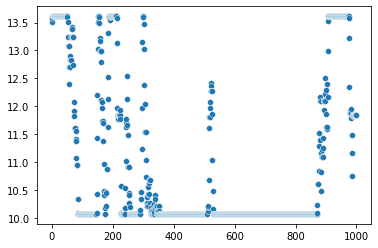

In [292]:
sns.scatterplot(data=res_8_15[-1000:])

<AxesSubplot:ylabel='Value'>

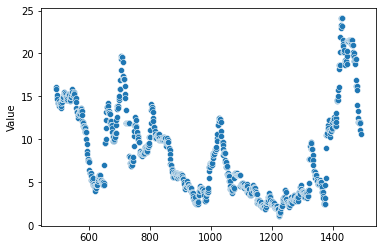

In [293]:
sns.scatterplot(data=df_8["Value"][-1000:])

In [294]:
print(res_8_30[-10:])

[11.8412121 11.8412121 11.8412121 11.8412121 11.8412121 11.8412121
 11.8412121 11.8412121 11.8412121 11.8412121]


In [295]:
def predict_data(df, **kwargs):
    model_type = str(kwargs.get("model", "SVR"))
    df = remove_zeros(df)
    df = df[df["Value"] <= 150]
    n = df.shape[0]
    X = np.array([i for i in range(1, n + 1)]).reshape(-1, 1)
    new_dates_15 = np.array([i for i in range(1, n + 15)]).reshape(-1, 1)
    new_dates_30 = np.array([i for i in range(1, n + 30)]).reshape(-1, 1)
    new_dates_45 = np.array([i for i in range(1, n + 45)]).reshape(-1, 1)
    if model_type == "SVR":
        model = SVR(kernel="rbf")
        
        
    if model_type == "MLP":
        model = MLPRegressor(batch_size=16, learning_rate="invscaling", 
                            activation="logistic")  # Batch size ~ N // 100
    model.fit(X=X, y=df["Value"])
    res_15 = model.predict(new_dates_15)
    res_30 = model.predict(new_dates_30)
    res_45 = model.predict(new_dates_45)
    return (res_15, res_30, res_45, df)

In [296]:
res_7_15, res_7_30, res_7_45, df_7 = predict_data(df_7, model="MLP")  # trying MLP model

<AxesSubplot:title={'center':'TD7'}>

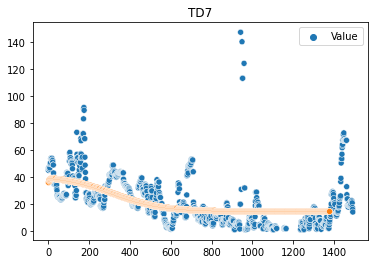

In [297]:
sns.scatterplot(data=df_7).set_title("TD7")  # Approximation for MLP model
sns.scatterplot(data=res_7_45)

In [298]:
res_7_15, res_7_30, res_7_45, df_7 = predict_data(df_7)

<AxesSubplot:title={'center':'TD7'}>

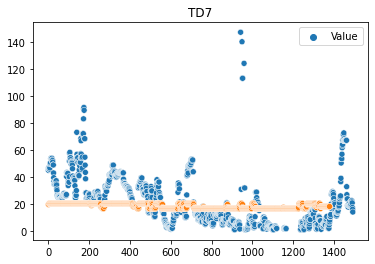

In [299]:
sns.scatterplot(data=df_7).set_title("TD7")
sns.scatterplot(data=res_7_45)

In [300]:
df_8 = pd.read_csv("data8.csv")
df_8.columns = ["Value"]
res_8_15, res_8_30, res_8_45, df_8 = predict_data(df_8)

<AxesSubplot:title={'center':'TD8'}>

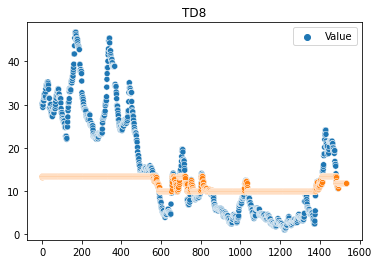

In [301]:
sns.scatterplot(data=df_8).set_title("TD8")
sns.scatterplot(data=res_8_45)

In [302]:
df_8 = pd.read_csv("data8.csv")
df_8.columns = ["Value"]
res_8_15, res_8_30, res_8_45, df_8 = predict_data(df_8, model="MLP")

<AxesSubplot:title={'center':'TD8'}>

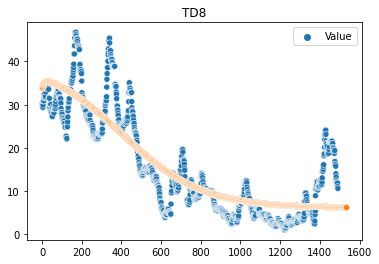

In [303]:
sns.scatterplot(data=df_8).set_title("TD8")
sns.scatterplot(data=res_8_45)

In [304]:
df_9 = pd.read_csv("data9.csv")
df_9.columns = ["Value"]

In [305]:
res_9_15, res_9_30, res_9_45, df_9 = predict_data(df_9)

<AxesSubplot:title={'center':'TD9'}>

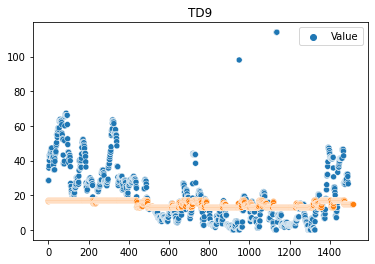

In [306]:
sns.scatterplot(data=df_9).set_title("TD9")
sns.scatterplot(data=res_9_45)

<AxesSubplot:title={'center':'TD9'}>

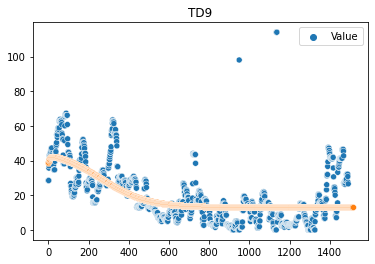

In [307]:
df_9 = pd.read_csv("data9.csv")
df_9.columns = ["Value"]
res_9_15, res_9_30, res_9_45, df_9 = predict_data(df_9, model="MLP")
sns.scatterplot(data=df_9).set_title("TD9")
sns.scatterplot(data=res_9_45)

In [308]:
df_14 = pd.read_csv("data14.csv")
df_14.columns = ["Value"]
res_14_15, res_14_30, res_14_45, df_14 = predict_data(df_14)

<AxesSubplot:title={'center':'TD14'}>

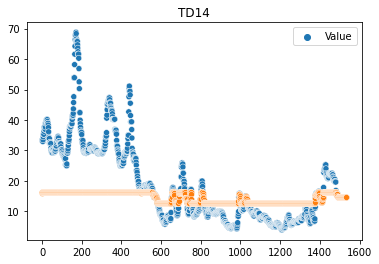

In [309]:
sns.scatterplot(data=df_14).set_title("TD14")
sns.scatterplot(data=res_14_45)

<AxesSubplot:title={'center':'TD14'}>

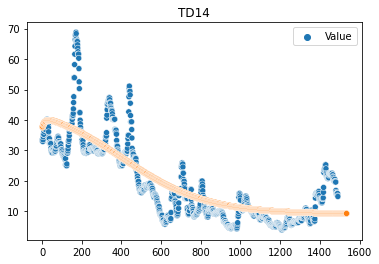

In [310]:
df_14 = pd.read_csv("data14.csv")
df_14.columns = ["Value"]
res_14_15, res_14_30, res_14_45, df_14 = predict_data(df_14, model="MLP")
sns.scatterplot(data=df_14).set_title("TD14")
sns.scatterplot(data=res_14_45)

In [311]:
df_17 = pd.read_csv("data17.csv")
df_17.columns = ["Value"]
res_17_15, res_17_30, res_17_45, df_17 = predict_data(df_17)

<AxesSubplot:title={'center':'TD17'}>

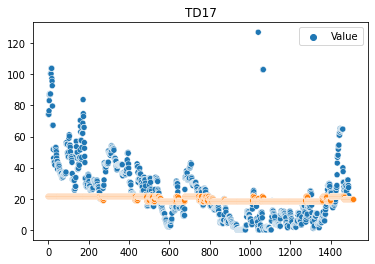

In [312]:
sns.scatterplot(data=df_17).set_title("TD17")
sns.scatterplot(data=res_17_45)

In [313]:
df_19 = pd.read_csv("data19.csv")
df_19.columns = ["Value"]
res_19_15, res_19_30, res_19_45, df_19 = predict_data(df_19)

<AxesSubplot:title={'center':'TD19'}>

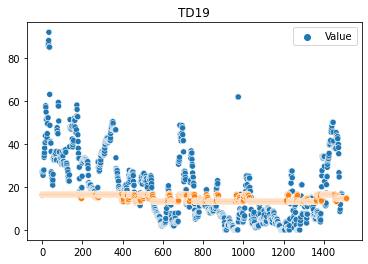

In [314]:
sns.scatterplot(data=df_19).set_title("TD19")
sns.scatterplot(data=res_19_45)

In [315]:
def create_csv(name, res1, res2, res3):
    max_len = max(max(len(res1), len(res2)), len(res3))
    for i in range(max_len):
        try:
            x = res1[i]
        except Exception:
            res1 = np.append(res1, [0], axis=0)
        try:
            x = res2[i]
        except Exception:
            res2 = np.append(res2, [0], axis=0)
        try:
            x = res3[i]
        except Exception:
            res3 = np.append(res3, [0], axis=0)
    df = pd.DataFrame({
        "res15": res1,
        "res30": res2, 
        "res45": res3
    })
    df.to_csv(name, index=False)

In [316]:
create_csv("res_14.csv", res_14_15, res_14_30, res_14_45)

In [317]:
create_csv("res_17.csv", res_17_15, res_17_30, res_17_45)

In [318]:
create_csv("res_19.csv", res_19_15, res_19_30, res_19_45)

In [319]:
create_csv("res_7.csv", res_7_15, res_7_30, res_7_45)

In [320]:
create_csv("res_8.csv", res_8_15, res_8_30, res_8_45)

In [321]:
create_csv("res_9.csv", res_9_15, res_9_30, res_9_45)